why PCA?
変数の数（＝次元数）は多いほどよいか?
– 変数を増やすと，相関のあるものが出てくる（変数を増やす効果が小さくなる）
– 分布を目視（プロット）して確認することが難しい
• 機械学習では
– 変数が多いほど，多くの学習データが必要（次元の呪い）
– 性能が逆に低下することがある（ヒューズの現象）
• したがって変数の削減（圧縮）が重要

what PCA?
'PCA的目标是找到一个新的坐标系，使得在新坐标系中数据的变化尽可能大。'  KL（Karhunen-Loève）変換

![Alt Text](Dic/PCA.png)

Input: PCA的输入是一个包含多个特征（变量）的数据集，这些特征可以代表不同的属性或测量值(x1,x2)
Output:PCA的主要输出是一组称为主成分的新变量。这些主成分是原始数据中的线性组合，每个主成分都捕捉了原始数据中的一部分方差。通俗地说，主成分是一种重新表示数据的方式，它们按照数据中的方差大小排列，第一个主成分包含最大的方差，第二个主成分包含第二大的方差，以此类推。

How PCA?
方差解释： PCA的一个判定方法是观察主成分所解释的方差比例。通常，我们关注累积方差解释率，即前几个主成分所解释的方差占总方差的比例。高累积方差解释率表示前几个主成分已经捕捉到了大部分数据的变异性。

降维效果： 另一个判定方法是观察降维后的数据集。如果用较少的主成分重新表示数据，同时保留了足够的信息，那么降维效果就好。通过观察降维后的数据集是否仍能够保持原始数据的关键特性，可以评估 PCA 的效果。


,speed,dist
1,4,2
2,4,10
3,7,4


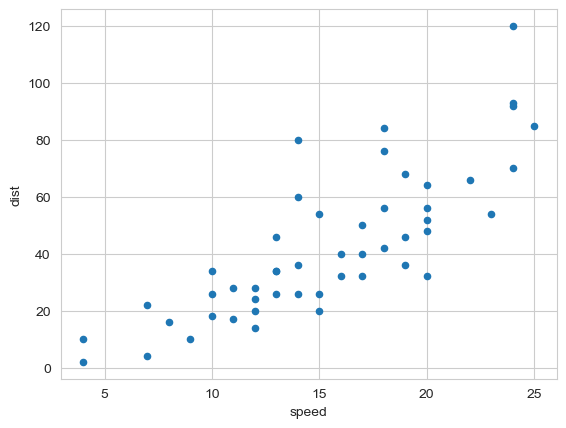

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


#list and ndarray
#series and dataframe


cars=pd.read_csv("cars.csv",index_col=0)
cars.plot(kind="scatter",x='speed',y='dist')
cars.head(3)

In [9]:
cars_pca=PCA(n_components=2)
cars_pca.fit(cars)
cars_pca.components_#每一行为一个主成分

array([[ 0.1656479 ,  0.98618496],
       [-0.98618496,  0.1656479 ]])

array([0.98628425, 0.01371575])

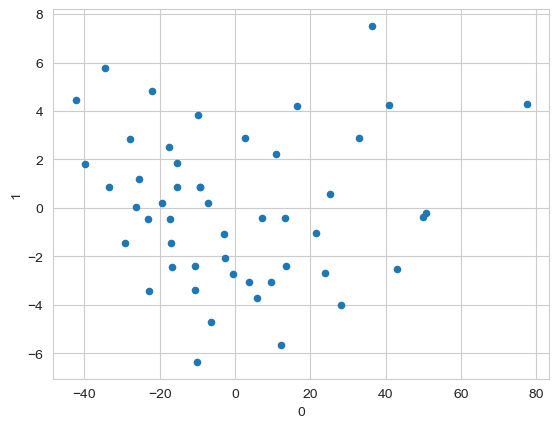

In [15]:
cars_pca_score = DataFrame(cars_pca.transform(cars))
cars_pca_score.plot(kind='scatter',x=0,y=1)
cars_pca.explained_variance_#方差看不出啥，只有大小基本没用
cars_pca.explained_variance_ratio_

Iris: アヤメの花の寸法（4つ）と品種名が計150件

In [30]:
from sklearn.datasets import load_iris
skiris = load_iris()
iris_data = DataFrame(skiris.data)
iris_data.columns = skiris.feature_names
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
#种类常用来作为target
iris_tgt = DataFrame(skiris.target_names[skiris.target])
iris_tgt.columns = ['species']
iris = pd.concat([iris_data, iris_tgt], axis=1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [39]:
iris_pca=PCA(n_components=4)
iris_pca.fit(iris_data)
iris_pca.components_
iris_pca.explained_variance_ratio_
np.cumsum(iris_pca.explained_variance_ratio_)#累计函数好用，一般取到70%-80%

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

<Axes: xlabel='0', ylabel='1'>

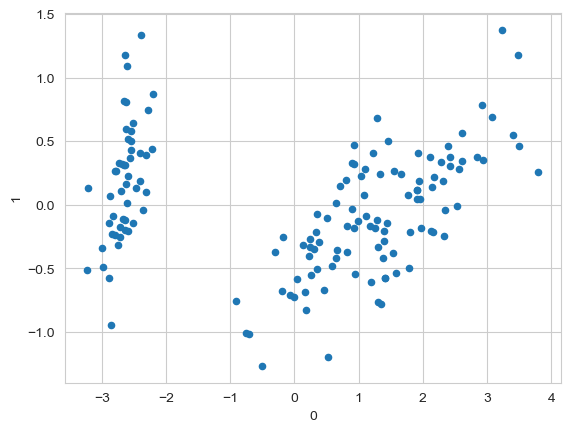

In [48]:
iris_pca=PCA(n_components=2)
iris_pca.fit(iris_data)#pca对象中储存了拟合参数
iris_pca_score = DataFrame(iris_pca.transform(iris_data))#用拟合参数重新tranform原数据得到score
iris_pca_score.plot(kind='scatter',x=0,y=1)

部分空間の決定
![Alt Text](Dic/pca1.png)
![Alt Text](Dic/pca2.png)